🟦 Cell 1: Import Libraries

In [1]:
# 📦 Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🗺️ For mapping (later)
import folium
from folium.plugins import MarkerCluster

# ⛔ Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# ✅ Set plotting style
sns.set(style="whitegrid")

🟦 Cell 2: Load CSV Files

In [2]:
# 📁 File paths
potholes_path = "../data/raw/Potholes_filled_2018.csv"
roads_2015_path = "../data/raw/Road_Ratings_2015.csv"
roads_2017_path = "../data/raw/Road_Ratings_2017.csv"
water_main_path = "../data/raw/Water_Main_Breaks_(2004-2019).csv"

# 📄 Read CSVs
df_potholes = pd.read_csv(potholes_path)
df_roads_2015 = pd.read_csv(roads_2015_path)
df_roads_2017 = pd.read_csv(roads_2017_path)
df_water = pd.read_csv(water_main_path)

🟦 Cell 3: Quick Shape & Glimpse

In [3]:
# 👀 Show basic shape and columns
print("Potholes Filled (2018):", df_potholes.shape)
print("Columns:", df_potholes.columns.tolist(), '\n')

print("Road Ratings (2015):", df_roads_2015.shape)
print("Road Ratings (2017):", df_roads_2017.shape)
print("Water Main Breaks:", df_water.shape)

Potholes Filled (2018): (3462, 11)
Columns: ['X', 'Y', 'TNT_NAME', 'activity_type', 'address', 'date_fixed', 'latitude', 'longitude', 'repair_type', 'truck_name', 'FID'] 

Road Ratings (2015): (4846, 16)
Road Ratings (2017): (4854, 16)
Water Main Breaks: (3042, 13)


🟦 Cell 4: First rows + schema

In [4]:
# 🔍 Quick preview
display(df_potholes.head())
display(df_roads_2015.head())
display(df_roads_2017.head())
display(df_water.head())

,X,Y,TNT_NAME,activity_type,address,date_fixed,latitude,longitude,repair_type,truck_name,FID
0,-8.475620e+06,5.318109e+06,Eastside,Accessory On,745 IRVING AVE & WAVERLY AVE ...,2018/01/25 23:14:31+00,43.040304,-76.137785,STREET REPAIR,DP1,1
1,-8.472560e+06,5.320302e+06,Eastside,Accessory On,1246 CANAL ST SYRACUSE 13210 ...,2018/01/26 00:37:11+00,43.054701,-76.110304,STREET REPAIR,DP1,2
2,-8.472446e+06,5.320507e+06,Eastside,Accessory On,1832 EB I 690 SYRACUSE 13210 ...,2018/02/23 06:22:01+00,43.056050,-76.109275,STREET REPAIR,DP1,3
3,-8.472455e+06,5.320507e+06,Eastside,Accessory On,1830 EB I 690 SYRACUSE 13210 ...,2018/02/23 06:24:19+00,43.056048,-76.109358,STREET REPAIR,DP1,4
4,-8.472455e+06,5.320512e+06,Eastside,Accessory On,1830 EB I 690 SYRACUSE 13210 ...,2018/02/23 06:25:32+00,43.056080,-76.109358,STREET REPAIR,DP1,5


,block,streetName,streetType,streetDirection,overall,crack,patch,length,width,dateRated,dateLastOverlay,flushOil,class,pavement,streetID,FID
0,100,CHARLOTTE,ST,NaN,6,3,3,1003.0,18.0,6/14,1999.0,O,Local,3.0,12572795,1
1,100,BALDWIN,AVE,NaN,6,3,2,1007.0,27.0,4/15,1991.0,O,Local,3.0,12571994,2
2,0,KINGSLEY,PL,NaN,5,2,4,606.0,0.0,4/15,NaN,NaN,Local,NaN,12572861,3
3,100,CHARMOUTH,DR,NaN,4,2,2,792.0,27.0,4/15,1991.0,O,Local,3.0,12572041,4
4,100,BERTRAM,PL,NaN,6,3,4,1060.0,28.0,4/15,2004.0,O,Local,3.0,12572064,5


,block,streetName,streetType,streetDirection,overall,crack,patch,length,width,dateRated,dateLastOverlay,flushOil,class,pavement,streetID,FID
0,100,ADAMS,ST,E,10,5,5,176.0,64.0,6/15,2015.0,F,Local,6.0,12577644.0,1
1,200,ADAMS,ST,E,10,5,5,557.0,64.0,6/15,2015.0,F,Local,6.0,12577647.0,2
2,200,ADAMS,ST,E,10,5,5,557.0,64.0,6/15,2015.0,F,Local,6.0,12577645.0,3
3,300,ADAMS,ST,E,10,5,5,358.0,64.0,6/15,2015.0,F,Local,6.0,12577648.0,4
4,400,ADAMS,ST,E,10,5,5,469.0,64.0,6/15,2015.0,F,Local,6.0,12577661.0,5


,X,Y,fullDate,location,leakClass,month,date,weekday,year,week,lon,lat,ObjectId
0,-8.479826e+06,5.319088e+06,2011/01/14 00:00:00+00,1205 W FAYETTE ST,0,1.0,14.0,NaN,2011.0,2.0,-76.175575,43.046733,1
1,-8.474632e+06,5.314544e+06,2011/01/14 00:00:00+00,1003 JAMESVILLE AVE,0,1.0,14.0,NaN,2011.0,2.0,-76.128918,43.016895,2
2,-8.478344e+06,5.316543e+06,2011/01/14 00:00:00+00,PALMER AVE & CHENEY ST,0,1.0,14.0,NaN,2011.0,2.0,-76.162257,43.030022,3
3,-8.472936e+06,5.319305e+06,2011/01/16 00:00:00+00,2100 E FAYETTE ST,0,1.0,16.0,NaN,2011.0,3.0,-76.113683,43.048158,4
4,-8.477195e+06,5.320761e+06,2011/01/17 00:00:00+00,206 BUTTERNUT ST,0,1.0,17.0,NaN,2011.0,3.0,-76.151936,43.057713,5


🟦 Cell 5: Info (data types + missing values)

In [5]:
print("✅ Potholes dataset info")
df_potholes.info()

print("\n✅ Roads 2015 dataset info")
df_roads_2015.info()

print("\n✅ Roads 2017 dataset info")
df_roads_2017.info()

print("\n✅ Water main breaks dataset info")
df_water.info()

✅ Potholes dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              3462 non-null   float64
 1   Y              3462 non-null   float64
 2   TNT_NAME       3423 non-null   object 
 3   activity_type  3462 non-null   object 
 4   address        3462 non-null   object 
 5   date_fixed     3462 non-null   object 
 6   latitude       3462 non-null   float64
 7   longitude      3462 non-null   float64
 8   repair_type    3462 non-null   object 
 9   truck_name     3462 non-null   object 
 10  FID            3462 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 297.6+ KB

✅ Roads 2015 dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bl

🟦 Cell 6: Missing values summary (most important)

In [6]:
def missing_report(df, name):
    miss = df.isna().sum().sort_values(ascending=False)
    miss = miss[miss > 0]
    print(f"\n📌 Missing values report: {name}")
    if len(miss) == 0:
        print("✅ No missing values found.")
    else:
        display(miss)

missing_report(df_potholes, "Potholes Filled 2018")
missing_report(df_roads_2015, "Road Ratings 2015")
missing_report(df_roads_2017, "Road Ratings 2017")
missing_report(df_water, "Water Main Breaks 2004-2019")


📌 Missing values report: Potholes Filled 2018


TNT_NAME    39
dtype: int64


📌 Missing values report: Road Ratings 2015


streetDirection    3839
dateLastOverlay    1252
width               153
pavement             37
length               27
flushOil              8
dateRated             5
dtype: int64


📌 Missing values report: Road Ratings 2017


streetDirection    3841
dateLastOverlay    1235
width               153
pavement             37
length               26
flushOil              8
streetID              8
class                 6
dateRated             4
dtype: int64


📌 Missing values report: Water Main Breaks 2004-2019


weekday     3042
location      16
fullDate       1
month          1
date           1
year           1
week           1
dtype: int64

🟦 Cell 7: Convert date columns

In [9]:
# ⏳ Convert date columns to datetime
df_potholes['date_fixed'] = pd.to_datetime(df_potholes['date_fixed'], errors='coerce')
df_water['break_date'] = pd.to_datetime(df_water['fullDate'], errors='coerce')

# 📆 Extract year and month (overwrite if already present just to be sure it's clean)
df_potholes['year'] = df_potholes['date_fixed'].dt.year
df_potholes['month'] = df_potholes['date_fixed'].dt.month

df_water['year'] = df_water['break_date'].dt.year
df_water['month'] = df_water['break_date'].dt.month

In [8]:
df_water.columns.tolist()

['X',
 'Y',
 'fullDate',
 'location',
 'leakClass',
 'month',
 'date',
 'weekday',
 'year',
 'week',
 'lon',
 'lat',
 'ObjectId']

🟦 Cell 8: Potholes Filled – Monthly Trend

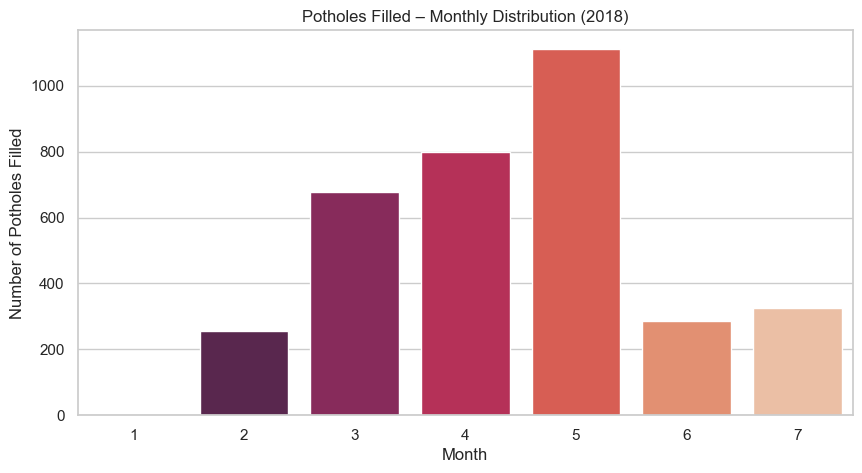

In [10]:
# 📈 Plot monthly pothole fixes
monthly_potholes = df_potholes.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='count', data=monthly_potholes, palette='rocket')
plt.title("Potholes Filled – Monthly Distribution (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Potholes Filled")
plt.show()

🟦 Cell 9: Water Main Breaks – Yearly Trend

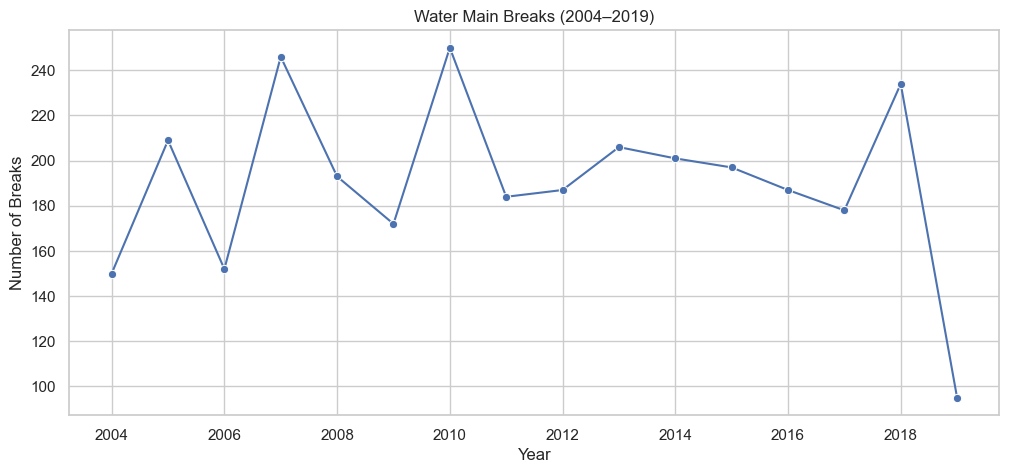

In [11]:
# 📈 Plot water main breaks over time
yearly_breaks = df_water['year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_breaks.index, y=yearly_breaks.values, marker='o')
plt.title("Water Main Breaks (2004–2019)")
plt.xlabel("Year")
plt.ylabel("Number of Breaks")
plt.grid(True)
plt.show()